In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

### Data loading

In [99]:
df = pd.read_csv('YCombinator 2006-2023.csv')
df.head(10)

,xid,#,Companies,Company ID,Deal ID,Deal Date,Announced Date,Deal Size,Pre-money Valuation,Post Valuation,...,Lead/Sole Investors,Employees,Revenue Growth since last debt deal,Revenue,EBITDA,Total Debt (from financials),Deal Synopsis,Financing Status Note,CEO (at time of deal),CEO PBId
0,48635,48386,Parakey (Software Development Applications),52732-99,19117-54T,17/11/2006 00:00,NaN,1.56,13.27,14.83,...,NaN,NaN,NaN,NaN,NaN,NaN,"The company raised $1.56 million of Series A funding from Sequoia Capital, O'Reilly AlphaTech Ventures, MSD Capital, YCombinator, Thomvest, Paul Buchheit, Ron Conway and Warren Zide on November 17, 2006, putting the pre-money valuation at $13.27 million.","The company was acquired by Facebook (NASDAQ: FB) on July 19, 2007 for an undisclosed amount. The company is no longer actively tracked by PitchBook.",{'62492-86P': 'Blake Ross'},62492-86P
1,58836,58587,Snaptalent,61729-75,32010-85T,01/01/2008 00:00,NaN,2.00,4.03,6.03,...,NaN,NaN,NaN,NaN,NaN,NaN,"The company joined Y Combinator as part of the Winter 2008 Class. The company raised $2 million of Series A seed funding from Y Combinator, Betaworks, Index Ventures (UK), SoftTech VC, Felicis Ventures Management Company and individual investors: Saul Klein, Robby Walker and Wayne Crosby in January 2008, putting the pre-money valuation at $4 million.","The company is no longer actively in business as of April 24, 2009. The company is no longer actively tracked by PitchBook.",NaN,NaN
2,60141,59892,FriendFeed,41728-33,19653-94T,25/02/2008 00:00,NaN,5.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"The company raised $5 million of Series A venture funding from Becnhmark Capital, Y Combinator and Sanjeev Singh on February 25, 2008.","The company was acquired by Facebook for $50 million on August 10, 2009. Facebook is backed by Accel Partners, Digital Sky Technologies, Elevation Partners, General Atlantic, Goldman Sachs, Greylock Partners, GSV capital, Industry Ventures, Interpublic Group of Companies, Kleiner Perkins Caufield & Co, Li Ka-shing, Meritech Capital Partners, Microsoft, Millennium Technology Ventures, T. Rowe Price, The Founders Fund, TripplePoint Capital and Western Technology Investors.",{'167058-55P': 'Jim Norris'},167058-55P
3,64785,64536,RescueTime,52794-46,135800-20T,23/09/2008 00:00,NaN,0.90,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"The company raised $900,000 of seed funding from True Ventures, Y Combinator and Christopher Sacca on September 23, 2008. Timothy Ferriss, Michael Seckler and Mike Koss also participated in the round.","True Ventures, Y Combinator, Lowercase Capital, Christopher Sacca, Matthew Mullenweg, Timothy Ferriss, Michael Seckler, and Mike Koss sold their stake in the company to an undisclosed buyer.",{'43621-03P': 'Brian Fioca'},43621-03P
4,66671,66422,CarWoo,51122-80,18676-81T,01/01/2009 00:00,NaN,1.93,2.69,4.62,...,NaN,NaN,NaN,NaN,NaN,NaN,"The company raised $1.9 million of seed funding from Comcast Ventures, Blumberg Capital, Accelerator Ventures, Y Combinator, Felicis Ventures, Paul Buchheit, Joshua Schachter and Dave McClure in 2009.","The company is no longer actively in business as of January 21, 2014. The company is no longer actively tracked by PitchBook.",{'38143-27P': 'Robert McClung'},38143-27P
5,71904,71655,Zecter,51420-25,17942-77T,26/10/2009 00:00,NaN,1.57,NaN,NaN,...,"{'51044-86': 'Sherpalo Ventures (Ram Shriram)', '51477-67': 'Tandem Capital'}",NaN,NaN,NaN,NaN,NaN,"The company raised $1.57 million of Series C funding led by Sherpalo Ventures and Tandem Entrepreneurs on October 26, 2009. Pinnacle Ventures and Douglas Bergeron also participated.","The company was acquired by Motorola (NYSE: MOT) on December 22, 2010. The company is no longer actively tracked by PitchBook.",NaN,NaN
6,73020,72771,500friends,53780-32,39558-07T,15/12/2009 00:00,NaN,1.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"The company raised $1.4 million of seed funding from Alex Le, Steve Newcomb, Richard Chen, Anurag (Anu) Nigam, David Li, Quest Venture Partn

In [100]:
df.columns

Index(['xid', '#', 'Companies', 'Company ID', 'Deal ID', 'Deal Date',
       'Announced Date', 'Deal Size', 'Pre-money Valuation', 'Post Valuation',
       '% Acquired', 'Price per Share', 'Debt Raised in Round',
       'Raised to Date', 'Deal Class', 'Deal Type', 'Deal Size Status',
       'Post Valuation Status', 'Investors', 'New Investors',
       'Lead/Sole Investors', 'Employees',
       'Revenue Growth since last debt deal', 'Revenue', 'EBITDA',
       'Total Debt (from financials)', 'Deal Synopsis',
       'Financing Status Note', 'CEO (at time of deal)', 'CEO PBId'],
      dtype='object')

In [101]:
# leaving only columns with important information
interesting_cols = [
    'xid', 'Companies', 'Company ID', 'Deal ID', 'Deal Date',
    'Deal Size', 'Pre-money Valuation', 'Post Valuation',
    '% Acquired', 'Price per Share', 'Debt Raised in Round',
    'Raised to Date', 'Deal Class', 'Deal Type', 'Deal Size Status',
    'Post Valuation Status', 'Investors', 'New Investors',
    'Lead/Sole Investors','Revenue Growth since last debt deal', 'Revenue', 'EBITDA','Total Debt (from financials)',
]

df = df[interesting_cols]
df

,xid,Companies,Company ID,Deal ID,Deal Date,Deal Size,Pre-money Valuation,Post Valuation,% Acquired,Price per Share,...,Deal Type,Deal Size Status,Post Valuation Status,Investors,New Investors,Lead/Sole Investors,Revenue Growth since last debt deal,Revenue,EBITDA,Total Debt (from financials)
0,48635,Parakey (Software Development Applications),52732-99,19117-54T,17/11/2006 00:00,1.56,13.27,14.83,0.1054,1.47,...,Early Stage VC,Actual,Actual,"{'42715-09': 'Baseline Ventures', '10521-55': 'DFO Management', '11263-87': ""O'Reilly AlphaTech Ventures"", '11295-73': 'Sequoia Capital', '106124-86': 'Steve Anderson (Steve Anderson)', '40995-55': 'Thomvest Ventures', '40420-36': 'Y Combinator'}","Baseline Ventures, DFO Management, O'Reilly AlphaTech Ventures, Sequoia Capital, Steve Anderson, Thomvest Ventures, Y Combinator",NaN,NaN,NaN,NaN,NaN
1,58836,Snaptalent,61729-75,32010-85T,01/01/2008 00:00,2.00,4.03,6.03,0.3316,0.40,...,Seed Round,Actual,Actual,"{'51007-51': 'Betaworks', '42715-00': 'Felicis', '11216-98': 'Index Ventures', '106614-91': 'Saul Klein (Saul Klein)', '51125-14': 'The Acceleration Group', '48176-38': 'Uncork Capital', '40420-36': 'Y Combinator'}","Betaworks, Felicis, Index Ventures, Saul Klein, The Acceleration Group, Uncork Capital, Y Combinator",NaN,NaN,NaN,NaN,NaN
2,60141,FriendFeed,41728-33,19653-94T,25/02/2008 00:00,5.00,NaN,NaN,NaN,NaN,...,Early Stage VC,Actual,NaN,"{'11133-01': 'Benchmark (San Francisco)', '40420-36': 'Y Combinator (Paul Buchheit)'}","Benchmark (San Francisco), Y Combinator",NaN,NaN,NaN,NaN,NaN
3,64785,RescueTime,52794-46,135800-20T,23/09/2008 00:00,0.90,NaN,NaN,NaN,NaN,...,Seed Round,Actual,NaN,"{'106007-68': 'Christopher Sacca (Christopher Sacca)', '223079-77': 'Michael Seckler (Michael Seckler)', '223080-40': 'Mike Koss (Mike Koss)', '106015-06': 'Timothy Ferriss (Timothy Ferriss)', '11321-29': 'True Ventures (Christiaan Vorkink)', '40420-36': 'Y Combinator'}","Christopher Sacca, Michael Seckler, Mike Koss, True Ventures",NaN,NaN,NaN,NaN,NaN
4,66671,CarWoo,51122-80,18676-81T,01/01/2009 00:00,1.93,2.69,4.62,0.4181,0.18,...,Seed Round,Actual,Actual,"{'50987-89': 'Accelerator Ventures', '11127-25': 'Blumberg Capital', '11174-86': 'Comcast Ventures (Michael Yang)', '42715-00': 'Felicis', '40420-36': 'Y Combinator'}","Accelerator Ventures, Blumberg Capital, Comcast Ventures, Felicis",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,314141,Reflex (Software Development Applications),520530-40,223029-82T,02/08/2023 00:00,5.00,NaN,NaN,NaN,NaN,...,Seed Round,Actual,NaN,"{'179440-93': 'Abstract Ventures', '11229-04': 'Lux Capital', '470754-10': 'Outset Capital', '160439-86': 'Picus Capital', '66218-32': 'The Box Group', '40420-36': 'Y Combinator'}","Abstract Ventures, Lux Capital, Outset Capital, Picus Capital, The Box Group",{'11229-04': 'Lux Capital'},NaN,NaN,NaN,NaN
1343,314262,MindsDB,223449-22,212197-42T,08/08/2023 00:00,46.50,NaN,NaN,NaN,6.65,...,Early Stage VC,Actual,NaN,"{'11133-01': 'Benchmark (San Francisco) (Chetan Puttagunta)', '336984-85': 'Christopher Golda (Christopher Golda)', '11237-95': 'Mayfield Fund (Navin Chaddha)', '481429-99': 'nVentures (Mohamed Siddeek)', '530775-73': 'NVentures (Santa Clara)', '41161-24': 'Nvidia (NAS: NVDA)', '52225-75': 'OpenOcean VC', '471185-74': 'Richard Dulude', '232265-71': 'TQ Ventures', '234859-33': 'Tuck Lye Koh (Tuck Lye Koh)', '460280-44': 'Walden Catalyst', '40420-36': 'Y Combinator'}","Benchmark (San Francisco), Christopher Golda, Mayfield Fund, nVentures, NVentures (Santa Clara), Nvidia, Richard Dulude, TQ Ventures, Tuck Lye Koh","{'11133-01': 'Benchmark (San Francisco) (Chetan Puttagunta)', '11237-95': 'Mayfield Fund (Navin Chaddha)', '481429-99': 'nVentures (Mohamed Siddeek)'}",NaN,NaN,NaN,NaN
1344,314273,Daybreak Health,434212-21,233351-02T,08/08/2023 00:00,13.00,52.00,65.00,0.2000,2.63,...,Early Stage VC,Actual,Actual,"{'11333-26': 'Lightspeed Venture Partners', '11229-04': 'Lux 

### Statistical feature importance

Firstly we want to analysize whether Deal size is dependent on Deal type. Let's see all values and the amount of rows in dataset.

In [102]:
df['Deal Type'].unique()

array(['Early Stage VC', 'Seed Round', 'Later Stage VC',
       'Accelerator/Incubator', 'Angel (individual)', 'Grant',
       'Equity Crowdfunding', 'Merger/Acquisition'], dtype=object)

In [103]:
deal_size_early_vc = df[df['Deal Type'] == 'Early Stage VC']['Deal Size'].values
len(deal_size_early_vc)

488

In [104]:
deal_size_seed_round = df[df['Deal Type'] == 'Seed Round']['Deal Size'].values
len(deal_size_seed_round)

621

In [105]:
deal_size_later_vc = df[df['Deal Type'] == 'Later Stage VC']['Deal Size'].values
len(deal_size_later_vc)

212

In [106]:
deal_size_accelerator = df[df['Deal Type'] == 'Accelerator/Incubator']['Deal Size'].values
len(deal_size_accelerator)

18

In [107]:
deal_size_angel = df[df['Deal Type'] == 'Angel (individual)']['Deal Size'].values
len(deal_size_angel)

2

In [108]:
deal_size_grant = df[df['Deal Type'] == 'Grant']['Deal Size'].values
len(deal_size_grant)

2

In [109]:
deal_size_crowd = df[df['Deal Type'] == 'Equity Crowdfunding']['Deal Size'].values
len(deal_size_crowd)

3

In [110]:
deal_size_merger = df[df['Deal Type'] == 'Merger/Acquisition']['Deal Size'].values
len(deal_size_merger)

1

We can see that only 3 Deal types have enough data in the dataset. We can proceed to analyze only them and visualize some data.

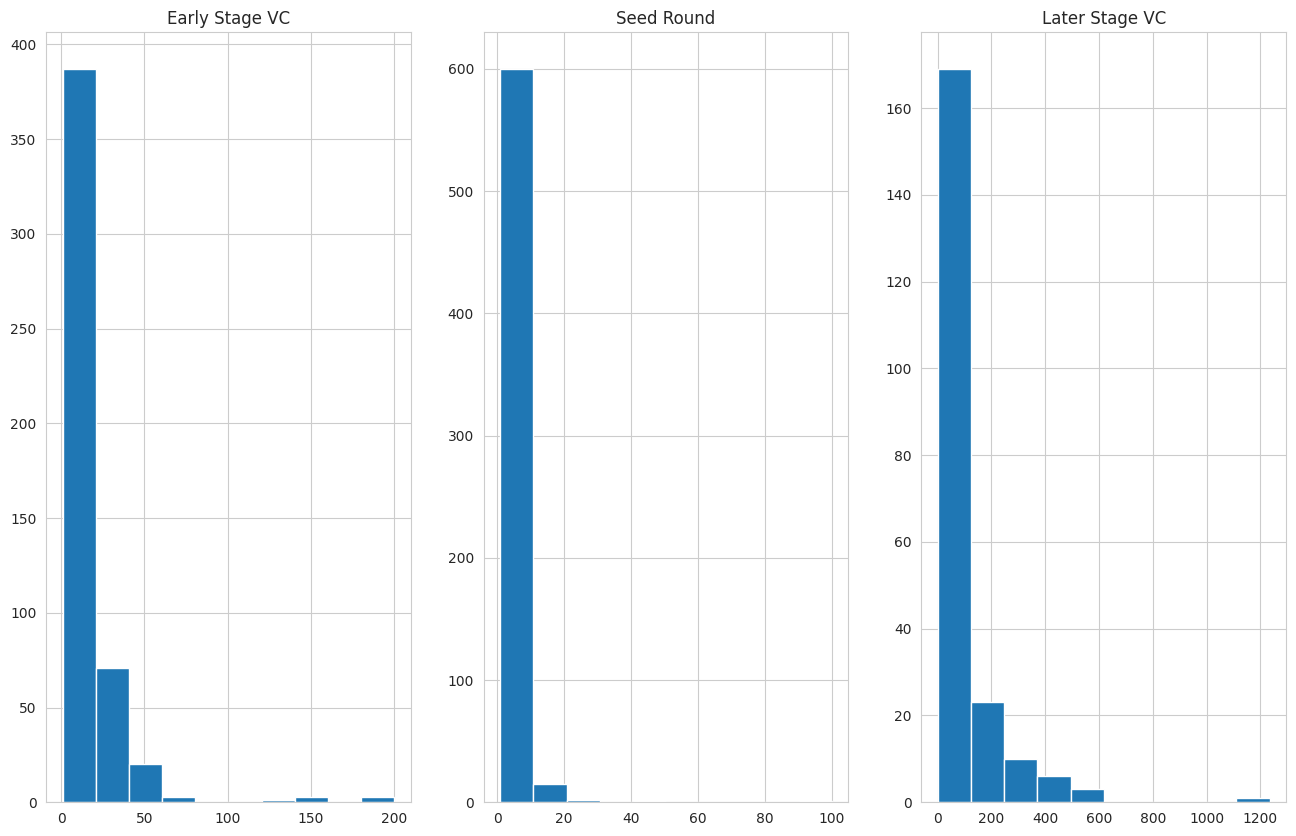

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt


with sns.axes_style('whitegrid'):
    plt.figure(figsize=(16, 10))
    plt.subplot(1, 3, 1)
    plt.title("Early Stage VC")
    plt.hist(deal_size_early_vc)

    plt.subplot(1, 3, 2)
    plt.title("Seed Round")
    plt.hist(deal_size_seed_round)

    plt.subplot(1, 3, 3)
    plt.title("Later Stage VC")
    plt.hist(deal_size_later_vc)


Now we can apply some statistical criterions to test the hyposesis: Deal type does not influence Deal size.

In [112]:
from scipy.stats import mannwhitneyu, ttest_ind

_, p = mannwhitneyu(deal_size_early_vc, deal_size_later_vc, method="exact", alternative="two-sided")

if p < 0.05:
    print("There is statistical difference between Early VC and Later VC")

There is statistical difference between Early VC and Later VC


In [113]:
from scipy.stats import ttest_ind

_, p = ttest_ind(deal_size_early_vc, deal_size_seed_round, nan_policy='omit')

if p < 0.05:
    print("There is statistical difference between Early VC and Seed Round")
else:
    print(f"P-value: {p}")

There is statistical difference between Early VC and Seed Round


In [114]:
_, p = ttest_ind(deal_size_later_vc, deal_size_seed_round, nan_policy='omit')

if p < 0.05:
    print("There is statistical difference between Later VC and Seed Round")
else:
    print(f"P-value: {p}")

There is statistical difference between Later VC and Seed Round


In [29]:
# we can see proves of the criterions only looking at mean values
np.nanmean(deal_size_early_vc), np.nanmean(deal_size_seed_round), np.nanmean(deal_size_later_vc)

(15.782090163934425, 3.7837156704361874, 85.06377358490566)

#### Analyzing company's tags

Previous analysis did not give us any new or interesting information. We have another dataset, which combines the original dataset with loads of addditional information from YC site, having such valuable information as company's tags. We can apply the same hyposesis to the influence of company's tags on the deal size.

In [116]:
joined = pd.read_csv('joined_tables.csv')
joined.columns

Index(['Unnamed: 0', 'id', 'name', 'slug', 'former_names',
       'small_logo_thumb_url', 'website', 'all_locations', 'long_description',
       'one_liner', 'team_size', 'highlight_black', 'highlight_latinx',
       'highlight_women', 'industry', 'subindustry', 'launched_at', 'tags',
       'tags_highlighted', 'top_company', 'top_company_by_revenue', 'isHiring',
       'nonprofit', 'batch', 'status', 'industries', 'regions', 'stage',
       'app_video_public', 'demo_day_video_public', 'app_answers',
       'question_answers', 'objectID', 'xid', '#', 'Companies', 'Company ID',
       'Deal ID', 'Deal Date', 'Announced Date', 'Deal Size',
       'Pre-money Valuation', 'Post Valuation', '% Acquired',
       'Price per Share', 'Debt Raised in Round', 'Raised to Date',
       'Deal Class', 'Deal Type', 'Deal Size Status', 'Post Valuation Status',
       'Investors', 'New Investors', 'Lead/Sole Investors', 'Employees',
       'Revenue Growth since last debt deal', 'Revenue', 'EBITDA',
     

In [54]:
joined = joined.dropna(subset=['Deal Size'])

list(joined['tags'].values)

['["SaaS", "Data Engineering"]',
 '["SaaS", "LegalTech"]',
 '["SaaS", "LegalTech"]',
 '["SaaS", "LegalTech"]',
 '["SaaS", "LegalTech"]',
 '["Fintech", "Payments"]',
 '["Fintech", "Payments"]',
 '["eLearning"]',
 '["Fintech", "SaaS", "Human Resources", "HR Tech", "Investing"]',
 '["Fintech", "SaaS", "Human Resources", "HR Tech", "Investing"]',
 '["Marketplace"]',
 '["Marketplace"]',
 '["Hardware", "Health Tech"]',
 '["Hardware", "Health Tech"]',
 '["Hardware", "Health Tech"]',
 '["Hardware", "Health Tech"]',
 '["Fintech"]',
 '["Developer Tools", "Video"]',
 '["Developer Tools", "Video"]',
 '["Medical Devices", "Biotech", "Diagnostics"]',
 '["SaaS", "Data Engineering"]',
 '[]',
 '["Consumer Health Services", "Primary Care"]',
 '["Medical Devices", "Healthcare", "Telemedicine"]',
 '["Medical Devices", "Healthcare", "Telemedicine"]',
 '["Vertical Farming", "Agriculture", "Sustainable Agriculture"]',
 '["Fintech", "SaaS", "B2B"]',
 '["Marketplace", "B2B", "Cannabis"]',
 '["Marketplace", "B2

We can see that there are quite a lot of different tags and it would be a nightmare to analyse all combinations. However applying ChatGPT we can divide them into 6 significant groups and analyze them.

In [117]:
import json

res = []

for str_arr in list(joined['tags'].values):
    res += json.loads(str_arr)


def tech_cat(text):
    tech_and_ai = ['3D Printing', 'AI', 'AI-Enhanced Learning', 'AI-powered Drug Discovery', 'AIOps', 'API', 'APIs', 'Automation', 'Autonomous Delivery', 'Autonomous Trucking', 'Big Data', 'Biotech', 'Biotechnology', 'Blockchain', 'Chat', 'Chatbots', 'Cloud Computing', 'Cloud Gaming', 'Coding Bootcamps', 'Computer Vision', 'Cryptography', 'DAO', 'Data Engineering', 'Data Labeling', 'Data Science', 'Deep Learning', 'DevOps', 'DevSecOps', 'Developer Tools', 'Digital Health', 'Drones', 'Edge Computing', 'Facial Recognition', 'Federated Learning', 'FinTech', 'Gaming', 'Gene Therapy', 'Generative AI', 'Genomics', 'IoT', 'Machine Learning', 'Nanotechnology', 'NLP', 'Quantum Computing', 'Robotics', 'SEO', 'VR']
    return any(value in text for value in tech_and_ai)


def business_and_finance_cat(text):
    business_and_finance = ['B2B', 'Banking as a Service', 'Billing', 'Crowdfunding', 'Crowdsourcing', 'FinOps', 'Fintech', 'Investing', 'Lending', 'Payments', 'Payroll', 'Procurement', 'Regtech', 'Reinforcement Learning', 'Trading']
    return any(value in text for value in business_and_finance)


def healthcare_cat(text):
    healthcare = ['Anti-Aging', 'Biometrics', 'COVID-19', 'Health & Wellness', 'Health Insurance', 'Healthcare', 'Healthcare IT', 'Medical Devices', 'Medical Robotics', 'Mental Health', 'Nanomedicine', 'Therapeutics']
    return any(value in text for value in healthcare)


def commerce_cat(text):
    commerce_and_retail = ['Advertising', 'Apparel', 'E-Commerce', 'Retail', 'Retail Tech', 'Food & Beverage', 'Marketplace', 'Restaurant Tech']
    return any(value in text for value in commerce_and_retail)


def energy_cat(text):
    energy_and_environment = ['Aerospace', 'Agriculture', 'Air Taxis', 'Airplanes', 'Climate', 'ClimateTech', 'Energy', 'Energy Storage', 'Renewable Energy', 'Solar Power', 'Sustainable Agriculture', 'Sustainable Fashion', 'Hydrogen Energy']
    return any(value in text for value in energy_and_environment)


def education_cat(text):
    education_and_personal_development = ['Careers', 'Coding Bootcamps', 'Education', 'eLearning', 'Training']
    return any(value in text for value in education_and_personal_development)


Firstly we will apply multiple tests to hypothesis on deal size

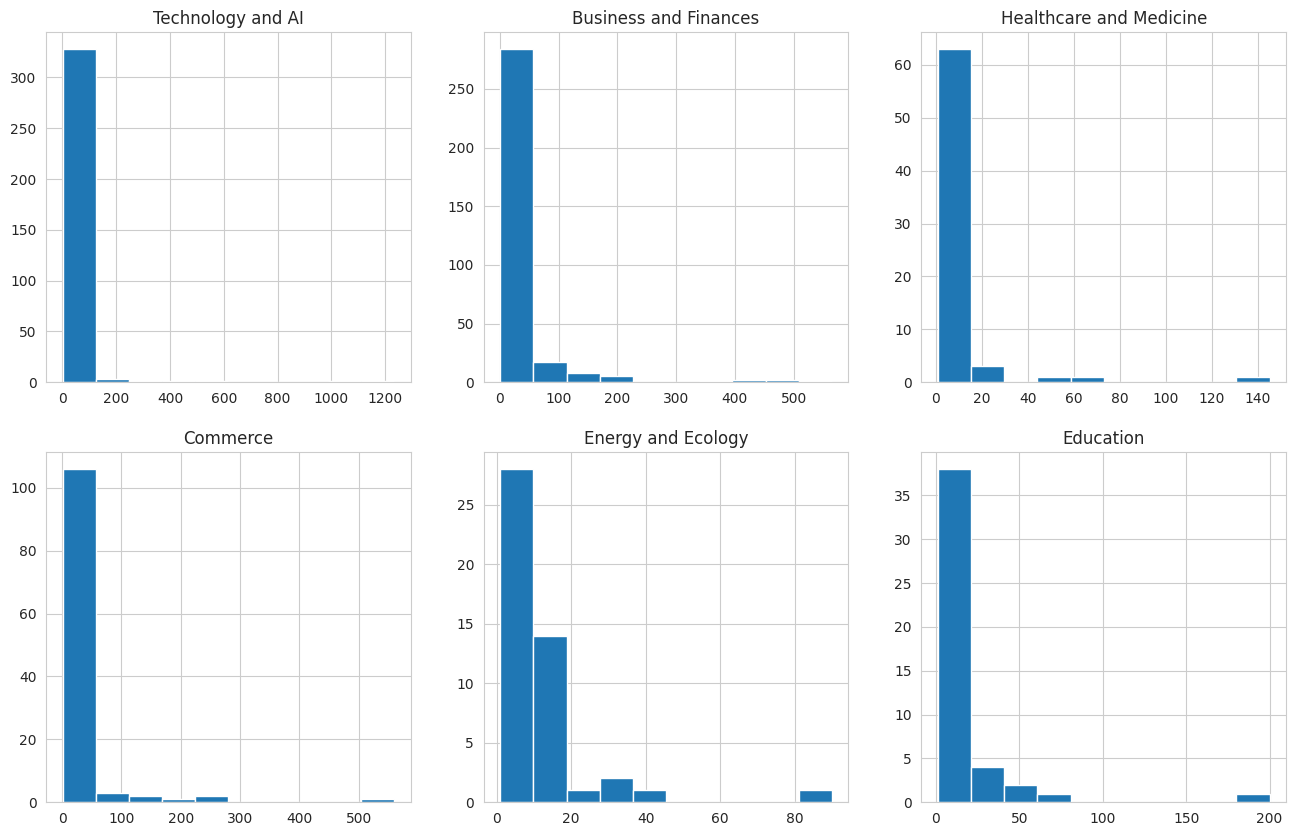

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt


with sns.axes_style('whitegrid'):
    plt.figure(figsize=(16, 10))
    plt.subplot(2, 3, 1)
    plt.title("Technology and AI")
    plt.hist(joined[joined['tags'].apply(lambda x: tech_cat(x) if pd.notna(x) else False)]['Deal Size'].values, bins=10)

    plt.subplot(2, 3, 2)
    plt.title("Business and Finances")
    plt.hist(joined[joined['tags'].apply(lambda x: business_and_finance_cat(x) if pd.notna(x) else False)]['Deal Size'].values, bins=10)

    plt.subplot(2, 3, 3)
    plt.title("Healthcare and Medicine")
    plt.hist(joined[joined['tags'].apply(lambda x: healthcare_cat(x) if pd.notna(x) else False)]['Deal Size'].values, bins=10)


    plt.subplot(2, 3, 4)
    plt.title("Commerce")
    plt.hist(joined[joined['tags'].apply(lambda x: commerce_cat(x) if pd.notna(x) else False)]['Deal Size'].values, bins=10)

    plt.subplot(2, 3, 5)
    plt.title("Energy and Ecology")
    plt.hist(joined[joined['tags'].apply(lambda x: energy_cat(x) if pd.notna(x) else False)]['Deal Size'].values, bins=10)

    plt.subplot(2, 3, 6)
    plt.title("Education")
    plt.hist(joined[joined['tags'].apply(lambda x: education_cat(x) if pd.notna(x) else False)]['Deal Size'].values, bins=10)


In [119]:
from statsmodels.stats.multitest import multipletests

tags = [
    "Technology and AI", "Business and Finances", "Healthcare and Medicine",
    "Commerce", "Energy and Ecology", "Education"]

tag_to_func = {
    "Technology and AI": tech_cat,
    "Business and Finances": business_and_finance_cat,
    "Healthcare and Medicine": healthcare_cat,
    "Commerce": commerce_cat,
    "Energy and Ecology": energy_cat,
    "Education": education_cat
}
pvalues = []
hypothesis = []

for i, tag in enumerate(tags):
  df_tag_1 = joined[joined['tags'].apply(lambda x: tag_to_func[tag](x) if pd.notna(x) else False)]['Deal Size'].values

  for tag2 in tags[i+1:]:
      df_tag_2 = joined[joined['tags'].apply(lambda x: tag_to_func[tag2](x) if pd.notna(x) else False)]['Deal Size'].values
      
      pvalues.append(ttest_ind(df_tag_1, df_tag_2, nan_policy='omit').pvalue)
      hypothesis.append(tag + ' ' + tag2)


multipletests(np.array(pvalues), alpha=0.05, method = "holm")

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.48842292, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 0.0034137129465903193,
 0.0033333333333333335)

We can see that None of the paired hypothsis are rejected, which means that there is no significant influence between tags and deal size. We can analyze Pre-money Valuation in the same way

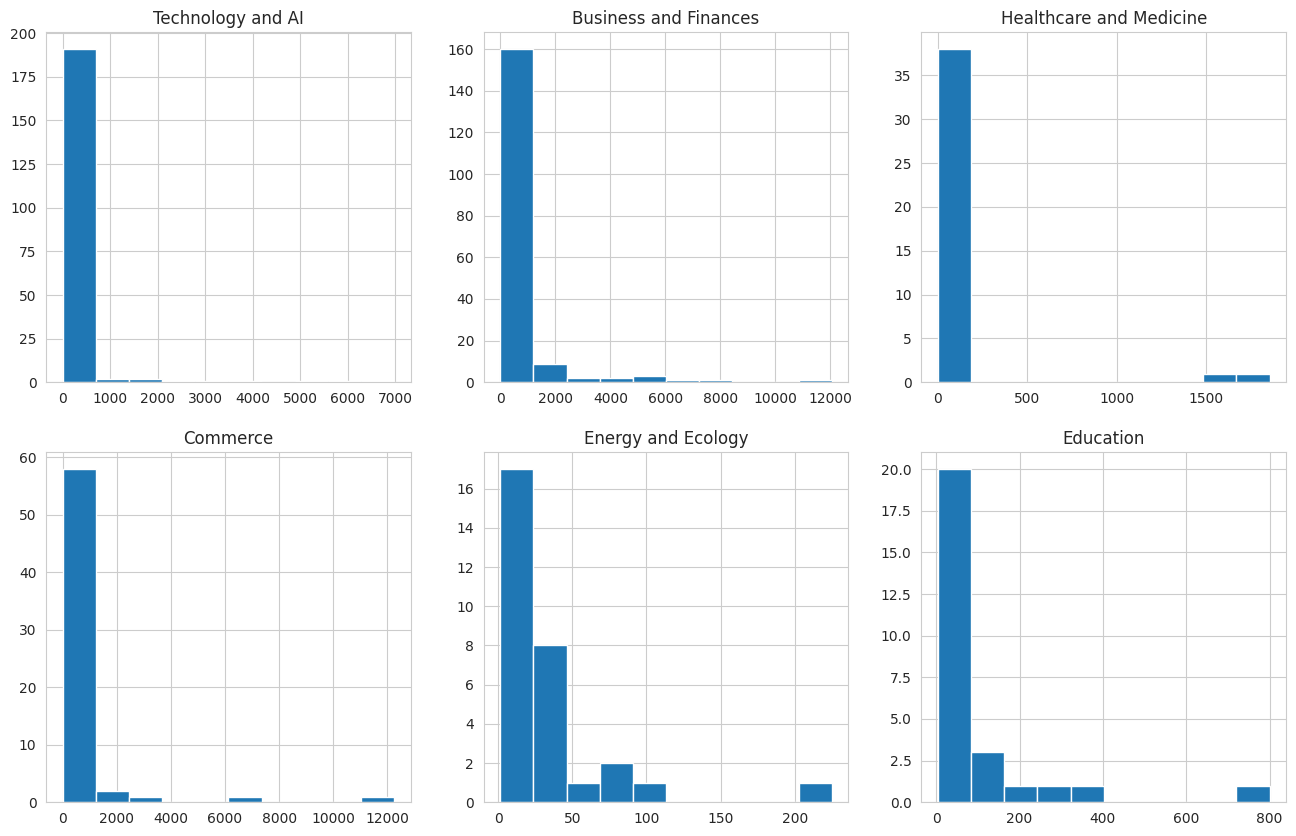

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt


with sns.axes_style('whitegrid'):
    plt.figure(figsize=(16, 10))
    plt.subplot(2, 3, 1)
    plt.title("Technology and AI")
    plt.hist(joined[joined['tags'].apply(lambda x: tech_cat(x) if pd.notna(x) else False)]['Pre-money Valuation'].values, bins=10)

    plt.subplot(2, 3, 2)
    plt.title("Business and Finances")
    plt.hist(joined[joined['tags'].apply(lambda x: business_and_finance_cat(x) if pd.notna(x) else False)]['Pre-money Valuation'].values, bins=10)

    plt.subplot(2, 3, 3)
    plt.title("Healthcare and Medicine")
    plt.hist(joined[joined['tags'].apply(lambda x: healthcare_cat(x) if pd.notna(x) else False)]['Pre-money Valuation'].values, bins=10)


    plt.subplot(2, 3, 4)
    plt.title("Commerce")
    plt.hist(joined[joined['tags'].apply(lambda x: commerce_cat(x) if pd.notna(x) else False)]['Pre-money Valuation'].values, bins=10)

    plt.subplot(2, 3, 5)
    plt.title("Energy and Ecology")
    plt.hist(joined[joined['tags'].apply(lambda x: energy_cat(x) if pd.notna(x) else False)]['Pre-money Valuation'].values, bins=10)

    plt.subplot(2, 3, 6)
    plt.title("Education")
    plt.hist(joined[joined['tags'].apply(lambda x: education_cat(x) if pd.notna(x) else False)]['Pre-money Valuation'].values, bins=10)


In [121]:
from statsmodels.stats.multitest import multipletests

pvalues = []
hypothesis = []

for i, tag in enumerate(tags):
  df_tag_1 = joined[joined['tags'].apply(lambda x: tag_to_func[tag](x) if pd.notna(x) else False)]['Pre-money Valuation'].values

  for tag2 in tags[i+1:]:
      df_tag_2 = joined[joined['tags'].apply(lambda x: tag_to_func[tag2](x) if pd.notna(x) else False)]['Pre-money Valuation'].values
      
      pvalues.append(ttest_ind(df_tag_1, df_tag_2, nan_policy='omit').pvalue)
      hypothesis.append(tag + ' ' + tag2)


multipletests(np.array(pvalues), alpha=0.05, method = "holm")

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([0.28411968, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 0.0034137129465903193,
 0.0033333333333333335)

Same result - nothing interesting. Let's try 1 more time with % Acquired

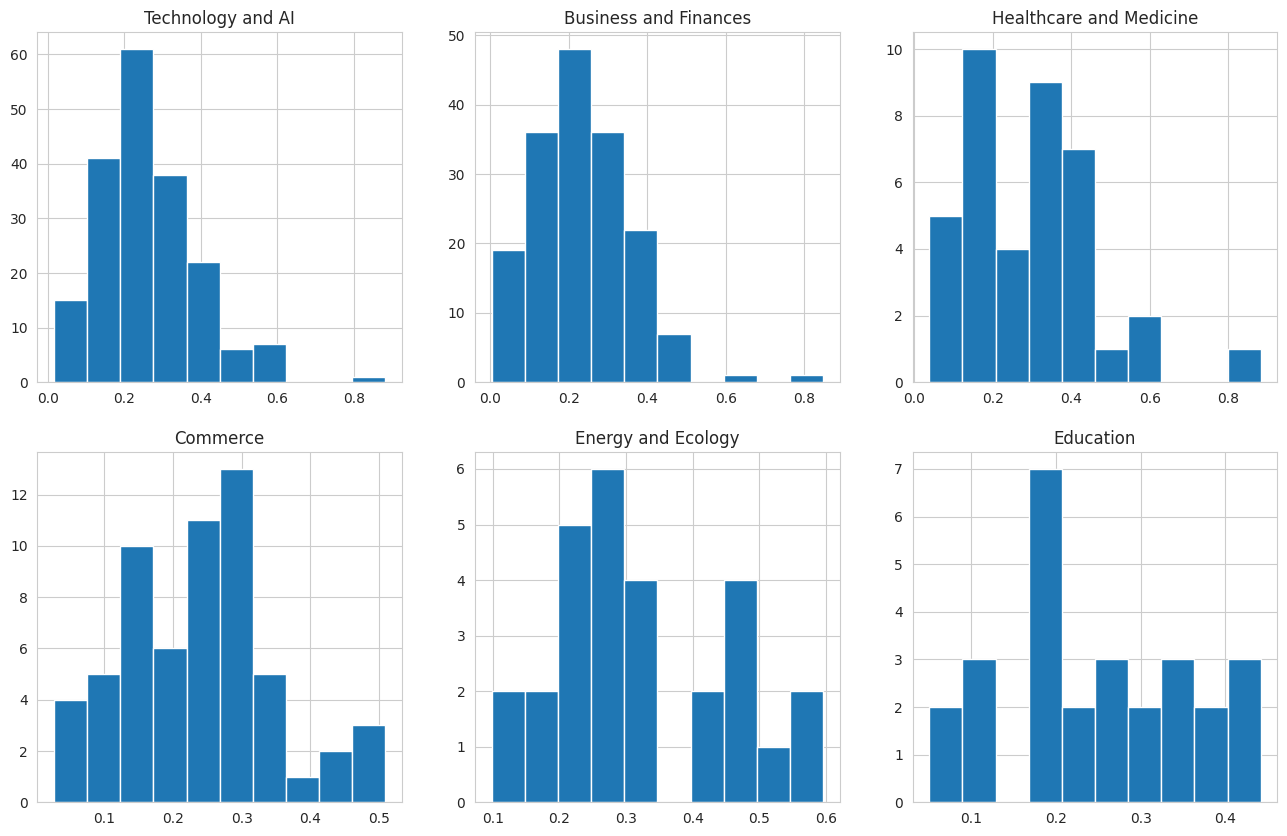

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt


with sns.axes_style('whitegrid'):
    plt.figure(figsize=(16, 10))
    plt.subplot(2, 3, 1)
    plt.title("Technology and AI")
    plt.hist(joined[joined['tags'].apply(lambda x: tech_cat(x) if pd.notna(x) else False)]['% Acquired'].values, bins=10)

    plt.subplot(2, 3, 2)
    plt.title("Business and Finances")
    plt.hist(joined[joined['tags'].apply(lambda x: business_and_finance_cat(x) if pd.notna(x) else False)]['% Acquired'].values, bins=10)

    plt.subplot(2, 3, 3)
    plt.title("Healthcare and Medicine")
    plt.hist(joined[joined['tags'].apply(lambda x: healthcare_cat(x) if pd.notna(x) else False)]['% Acquired'].values, bins=10)


    plt.subplot(2, 3, 4)
    plt.title("Commerce")
    plt.hist(joined[joined['tags'].apply(lambda x: commerce_cat(x) if pd.notna(x) else False)]['% Acquired'].values, bins=10)

    plt.subplot(2, 3, 5)
    plt.title("Energy and Ecology")
    plt.hist(joined[joined['tags'].apply(lambda x: energy_cat(x) if pd.notna(x) else False)]['% Acquired'].values, bins=10)

    plt.subplot(2, 3, 6)
    plt.title("Education")
    plt.hist(joined[joined['tags'].apply(lambda x: education_cat(x) if pd.notna(x) else False)]['% Acquired'].values, bins=10)


In [123]:
from statsmodels.stats.multitest import multipletests

pvalues = []
hypothesis = []

for i, tag in enumerate(tags):
  df_tag_1 = joined[joined['tags'].apply(lambda x: tag_to_func[tag](x) if pd.notna(x) else False)]['% Acquired'].values

  for tag2 in tags[i+1:]:
      df_tag_2 = joined[joined['tags'].apply(lambda x: tag_to_func[tag2](x) if pd.notna(x) else False)]['% Acquired'].values
      
      pvalues.append(ttest_ind(df_tag_1, df_tag_2, nan_policy='omit').pvalue)
      hypothesis.append(tag + ' ' + tag2)


multipletests(np.array(pvalues), alpha=0.05, method = "holm")

(array([False, False, False, False, False, False, False,  True, False,
        False, False, False,  True, False, False]),
 array([0.77792018, 1.        , 1.        , 0.09825124, 1.        ,
        0.20971509, 1.        , 0.0068091 , 1.        , 0.41075601,
        1.        , 1.        , 0.01363875, 1.        , 0.21860698]),
 0.0034137129465903193,
 0.0033333333333333335)

In [124]:
hypothesis

['Technology and AI Business and Finances',
 'Technology and AI Healthcare and Medicine',
 'Technology and AI Commerce',
 'Technology and AI Energy and Ecology',
 'Technology and AI Education',
 'Business and Finances Healthcare and Medicine',
 'Business and Finances Commerce',
 'Business and Finances Energy and Ecology',
 'Business and Finances Education',
 'Healthcare and Medicine Commerce',
 'Healthcare and Medicine Energy and Ecology',
 'Healthcare and Medicine Education',
 'Commerce Energy and Ecology',
 'Commerce Education',
 'Energy and Ecology Education']

Now we have some interesting informatio. As we can see - there are only significant difference in pairs
- Business and Finances vs Energy and Ecology 
- Commerce vs Energy and Ecology

### Investment growth

The next question i want to answer is - how much mony various inverstors gained from their investions? What is the mean values, and were there any unsuccessful deals?
Firstly i want to leave only those companies in data which had more than 1 deal information

In [125]:
len(df['Company ID'].unique())

1045

In [126]:
filtered_df = df.dropna(subset=['% Acquired'])

duplicates = filtered_df.duplicated(subset=['Company ID'], keep=False)

filtered_df = filtered_df[duplicates]

filtered_df.sort_values(by='Company ID', ascending=False)


,xid,Companies,Company ID,Deal ID,Deal Date,Deal Size,Pre-money Valuation,Post Valuation,% Acquired,Price per Share,...,Deal Type,Deal Size Status,Post Valuation Status,Investors,New Investors,Lead/Sole Investors,Revenue Growth since last debt deal,Revenue,EBITDA,Total Debt (from financials)
168,138427,Final,98233-12,44927-65T,01/05/2015 00:00,5.00,0.90,5.90,0.8475,0.08,...,Seed Round,Actual,Actual,"{'54843-67': 'Canyon Creek Capital', '51639-94': 'Ludlow Ventures (Jonathon Triest)', '55261-00': 'Right Side Capital Management', '54623-44': 'T5 Capital', '181926-82': 'UpHonest Capital', '40420-36': 'Y Combinator'}","Canyon Creek Capital, Ludlow Ventures, Right Side Capital Management, T5 Capital, UpHonest Capital",{'51639-94': 'Ludlow Ventures (Jonathon Triest)'},NaN,NaN,NaN,NaN
245,156642,Final,98233-12,72518-05T,29/06/2016 00:00,4.00,4.00,8.00,0.5000,0.38,...,Early Stage VC,Actual,Actual,"{'65419-66': 'BAM Ventures', '437605-93': 'Blue Trail Partners', '54843-67': 'Canyon Creek Capital', '227193-49': 'Catapult VC', '51253-84': 'DG Ventures (Digital Garage Group)', '63080-83': 'DRW Venture Capital', '467064-01': 'Future Communities Capital', '169319-80': 'GFO Companies', '62527-69': 'Hammerstone Capital', '342012-25': 'IOVC', '51022-00': 'Kima Ventures', '11228-50': 'Kleiner Perkins', '125500-78': 'Kow Mensah (Kow Mensah)', '160742-80': 'KPCB Edge', '51639-94': 'Ludlow Ventures (Jonathon Triest)', '106097-68': 'Michael Liou (Michael Liou)', '60007-78': 'Montage Ventures', '55261-00': 'Right Side Capital Management', '44459-38': 'Runa Capital (Andre Bliznyuk)', '54623-44': 'T5 Capital', '54096-40': 'Triple Five', '51755-50': 'Wavemaker Partners', '115026-85': 'Wei Guo (Wei Guo)', '40420-36': 'Y Combinator', '61745-95': 'Zillionize'}","BAM Ventures, Blue Trail Partners, Catapult VC, DG Ventures (Digital Garage Group), DRW Venture Capital, Future Communities Capital, GFO Companies, Hammerstone Capital, IOVC, Kima Ventures, Kleiner Perkins, Kow Mensah, KPCB Edge, Michael Liou, Montage Ventures, Runa Capital, Triple Five, Wavemaker Partners, Wei Guo, Zillionize",NaN,NaN,NaN,NaN,NaN
985,275851,Checkr,97867-54,179314-21T,01/10/2021 00:00,250.00,4350.00,4600.00,0.0543,54.00,...,Later Stage VC,Actual,Actual,"{'10139-41': 'Accel (Richard Wong)', '268133-77': 'avrhm capital', '265238-92': 'BOND Capital (San Francisco)', '56091-70': 'Coatue Management', '342094-33': 'Durable Capital Partners', '436948-03': 'Fabrica Ventures', '96060-25': 'Fidelity Management & Research', '10923-58': 'Franklin Templeton (NYS: BEN)', '11211-40': 'IVP', '11227-60': 'Khosla Ventures', '10072-54': 'T. Rowe Price (NAS: TROW)', '40420-36': 'Y Combinator (Ali Rowghani)'}","avrhm capital, Durable Capital Partners, Fabrica Ventures, Fidelity Management & Research, Franklin Templeton",{'342094-33': 'Durable Capital Partners'},NaN,NaN,NaN,NaN
616,213232,Checkr,97867-54,123445-09T,19/09/2019 00:00,160.62,2039.38,2200.00,0.0730,30.25,...,Later Stage VC,Actual,Actual,"{'10139-41': 'Accel (Richard Wong)', '265238-92': 'BOND Capital (San Francisco)', '56091-70': 'Coatue Management', '265404-07': 'Edelweiss Ventures', '342012-25': 'IOVC', '11211-40': 'IVP', '468003-79': 'Jake Dwyer (Jake Dwyer)', '224342-83': 'PV Seed Fund', '53738-11': 'SharesPost', '10072-54': 'T. Rowe Price (NAS: TROW)', '109672-30': 'Tomer London (Tomer London)', '115026-85': 'Wei Guo (Wei Guo)', '40420-36': 'Y Combinator (Ali Rowghani)'}","BOND Capital (San Francisco), Coatue Management, Edelweiss Ventures, IOVC, Jake Dwyer, PV Seed Fund, SharesPost, Tomer London, Wei Guo",{'10072-54': 'T. Rowe Price (NAS: TROW)'},NaN,NaN,NaN,NaN
408,186966,Checkr,97867-54,104330-80T,12/04/2018 00:00,100.00,800.00,900.00,0.1111,13.65,...,Later Stage VC,Actual,Actual,"{'10139-41': 'Accel (Richard Wong)', '11211-40': 'IVP (Jules Maltz)', '10072-54': 'T. Rowe Price (NAS: TROW) (Corey Shull)', '181926-82': 'UpHonest Capital', '40420-36': 'Y Combinator (Ali Rowghani)'}","T. Rowe Price, UpHonest Capital",{'10072-54': 'T. Ro

In [127]:
# function to convert string dict to real dict
def prepare_investor_dict(raw_data):
    dct = raw_data.replace('\'', '\"')
    dct = dct.replace('O\"', 'O\\"')
    dct = dct.replace('D\"Angelo', 'D\\"Angelo')
    dct = dct.replace('D\"Orazio', 'D\\"Orazio')
    dct = dct.replace('Lowe\"s', 'Lowe\\"s')
    dct = dct.replace('Sovereign\"s', 'Sovereign\\"s')
    dct = dct.replace('d\"Ursel', 'd\\"Ursel')
    dct = dct.replace('Monk\"s', 'Monk\\"s')
    dct = dct.replace('DAO\\', 'DAO')
    dct = dct.replace('Rahul\"s', 'Rahul\\"s') 
    dct = dct.replace('Brink\"s', 'Brink\\"s')
    dct = dct.replace('Taft\"s', 'Taft\\"s')
    return json.loads(dct.replace('Founders\" Co-op', 'Founders\\" Co-op'))

Now we can map inverstor deals to all companies he invested in and map investor key to his name

In [128]:
from collections import defaultdict
import json

unique_keys_count = defaultdict(str)
combined_dict = defaultdict(str)

for i, investors_dict in enumerate(filtered_df["Investors"]):
    dct = prepare_investor_dict(investors_dict)
    for key, value in dct.items():
        unique_keys_count[key] += (filtered_df.iloc[[i]]['Company ID'].values[0] + ',')
        combined_dict[key] = value

for key, count in unique_keys_count.items():
    print(f"Key {key}: {count}")
print(dict(combined_dict))


Key 105986-62: 56013-76,
Key 40420-36: 56013-76,56005-84,54163-00,55401-40,55758-97,55815-22,56334-34,54998-56,53351-38,61545-88,61260-13,155317-96,58572-73,111321-01,101368-90,115603-66,98233-12,101368-90,63690-94,111934-36,56334-34,88111-54,84804-13,63690-94,110393-29,54163-00,104050-18,117700-03,120587-95,155317-96,121369-42,61545-88,58167-28,97867-54,90839-08,58572-73,58146-22,115603-66,55401-40,88111-54,98233-12,102075-04,163154-17,54998-56,61260-13,168553-90,155954-98,66003-22,164353-60,154437-04,58136-23,120154-96,65891-35,162423-37,155954-98,112941-64,178995-07,102684-88,155925-46,65891-35,111321-01,53351-38,65530-72,185283-37,66032-74,163572-49,178888-96,56005-84,161796-97,153529-57,93911-14,56013-76,126334-90,103930-84,162423-37,104050-18,126055-90,120587-95,185001-58,187709-59,117700-03,182560-06,180780-13,90839-08,174742-39,120154-96,88111-54,121369-42,110393-29,155890-63,183692-26,113726-98,164310-40,156352-60,180189-19,162439-03,162423-37,155107-63,112941-64,58136-23,1088

In [129]:
len(combined_dict.keys()), len(set(combined_dict.values()))

(1751, 1751)

In [130]:
# reversing key to name dict
reversed_combined_dict = defaultdict(str)
for k, v in combined_dict.items():
    new_val = v.split('(')[0].strip()
    reversed_combined_dict[new_val] = k

#### Test run

Here i just gaining info about one random company. Later i will apply all logic to the whole table

In [131]:
example = filtered_df[filtered_df['Company ID'] == '97867-54']
example

,xid,Companies,Company ID,Deal ID,Deal Date,Deal Size,Pre-money Valuation,Post Valuation,% Acquired,Price per Share,...,Deal Type,Deal Size Status,Post Valuation Status,Investors,New Investors,Lead/Sole Investors,Revenue Growth since last debt deal,Revenue,EBITDA,Total Debt (from financials)
226,152556,Checkr,97867-54,59234-59T,23/03/2016 00:00,40.00,320.00,360.0,0.1111,6.39,...,Early Stage VC,Actual,Actual,"{'10139-41': 'Accel (Richard Wong)', '125702-02': 'CSC UpShot Ventures', '108358-57': 'FJ Labs', '49063-60': 'GV', '11211-40': 'IVP (Jules Maltz)', '40420-36': 'Y Combinator (Sam Altman)'}","CSC UpShot Ventures, FJ Labs, IVP",{'40420-36': 'Y Combinator (Sam Altman)'},NaN,35.0,NaN,NaN
408,186966,Checkr,97867-54,104330-80T,12/04/2018 00:00,100.00,800.00,900.0,0.1111,13.65,...,Later Stage VC,Actual,Actual,"{'10139-41': 'Accel (Richard Wong)', '11211-40': 'IVP (Jules Maltz)', '10072-54': 'T. Rowe Price (NAS: TROW) (Corey Shull)', '181926-82': 'UpHonest Capital', '40420-36': 'Y Combinator (Ali Rowghani)'}","T. Rowe Price, UpHonest Capital",{'10072-54': 'T. Rowe Price (NAS: TROW) (Corey Shull)'},NaN,NaN,NaN,NaN
616,213232,Checkr,97867-54,123445-09T,19/09/2019 00:00,160.62,2039.38,2200.0,0.0730,30.25,...,Later Stage VC,Actual,Actual,"{'10139-41': 'Accel (Richard Wong)', '265238-92': 'BOND Capital (San Francisco)', '56091-70': 'Coatue Management', '265404-07': 'Edelweiss Ventures', '342012-25': 'IOVC', '11211-40': 'IVP', '468003-79': 'Jake Dwyer (Jake Dwyer)', '224342-83': 'PV Seed Fund', '53738-11': 'SharesPost', '10072-54': 'T. Rowe Price (NAS: TROW)', '109672-30': 'Tomer London (Tomer London)', '115026-85': 'Wei Guo (Wei Guo)', '40420-36': 'Y Combinator (Ali Rowghani)'}","BOND Capital (San Francisco), Coatue Management, Edelweiss Ventures, IOVC, Jake Dwyer, PV Seed Fund, SharesPost, Tomer London, Wei Guo",{'10072-54': 'T. Rowe Price (NAS: TROW)'},NaN,NaN,NaN,NaN
985,275851,Checkr,97867-54,179314-21T,01/10/2021 00:00,250.00,4350.00,4600.0,0.0543,54.00,...,Later Stage VC,Actual,Actual,"{'10139-41': 'Accel (Richard Wong)', '268133-77': 'avrhm capital', '265238-92': 'BOND Capital (San Francisco)', '56091-70': 'Coatue Management', '342094-33': 'Durable Capital Partners', '436948-03': 'Fabrica Ventures', '96060-25': 'Fidelity Management & Research', '10923-58': 'Franklin Templeton (NYS: BEN)', '11211-40': 'IVP', '11227-60': 'Khosla Ventures', '10072-54': 'T. Rowe Price (NAS: TROW)', '40420-36': 'Y Combinator (Ali Rowghani)'}","avrhm capital, Durable Capital Partners, Fabrica Ventures, Fidelity Management & Research, Franklin Templeton",{'342094-33': 'Durable Capital Partners'},NaN,NaN,NaN,NaN


In [132]:
can_calc_investors = {
    '40420-36': {'percent': 0.07, 'initial_money': 0.15}  # this is YC data
}

last_price = None

for i, new_investors_str in enumerate(example["New Investors"]):
    # checking old investors
    all_current_inverstors = prepare_investor_dict(example.iloc[[i]]['Investors'].values[0])
    for inv_key in can_calc_investors.keys():
        if inv_key not in all_current_inverstors and ('resulted_money' not in can_calc_investors[inv_key]):  # means that he dropped out
            company_val = example.iloc[[i]]['Post Valuation'].values[0]
            can_calc_investors[inv_key]['resulted_money'] = can_calc_investors[inv_key]['percent'] * company_val

    # adding new inversors
    new_inv_arr = new_investors_str.split(',')
    new_investors = [x.split('(')[0].strip() for x in new_inv_arr]
    amount_of_new = len(new_investors)

    percent_per_each = example.iloc[[i]]['% Acquired'].values[0] / amount_of_new
    initial_money = example.iloc[[i]]['Deal Size'].values[0] / amount_of_new
    last_price = example.iloc[[i]]['Post Valuation'].values[0]

    new_inv_keys = [reversed_combined_dict[x] for x in new_investors]
    last_inv_keys = new_inv_keys
    for new_inv in new_inv_keys:
        can_calc_investors[new_inv] = {'percent': percent_per_each, 'initial_money': initial_money}


In [133]:
for inv_key in can_calc_investors.keys():
    if 'resulted_money' not in can_calc_investors[inv_key] and (inv_key not in last_inv_keys):
        can_calc_investors[inv_key]['resulted_money'] = can_calc_investors[inv_key]['percent'] * last_price

can_calc_investors

{'40420-36': {'percent': 0.07,
  'initial_money': 0.15,
  'resulted_money': 322.00000000000006},
 '125702-02': {'percent': 0.037033333333333335,
  'initial_money': 13.333333333333334,
  'resulted_money': 33.33},
 '108358-57': {'percent': 0.037033333333333335,
  'initial_money': 13.333333333333334,
  'resulted_money': 33.33},
 '11211-40': {'percent': 0.037033333333333335,
  'initial_money': 13.333333333333334,
  'resulted_money': 170.35333333333335},
 '10072-54': {'percent': 0.05555,
  'initial_money': 50.0,
  'resulted_money': 255.53},
 '181926-82': {'percent': 0.05555,
  'initial_money': 50.0,
  'resulted_money': 122.21000000000001},
 '265238-92': {'percent': 0.00811111111111111,
  'initial_money': 17.846666666666668,
  'resulted_money': 37.31111111111111},
 '56091-70': {'percent': 0.00811111111111111,
  'initial_money': 17.846666666666668,
  'resulted_money': 37.31111111111111},
 '265404-07': {'percent': 0.00811111111111111,
  'initial_money': 17.846666666666668,
  'resulted_money': 

In [134]:
money_earned = defaultdict(list)
for inv_key in can_calc_investors:
    if 'resulted_money' in can_calc_investors[inv_key]:
        money_earned[inv_key].append(can_calc_investors[inv_key]['resulted_money'] - can_calc_investors[inv_key]['initial_money'])

money_earned

defaultdict(list,
            {'40420-36': [321.8500000000001],
             '125702-02': [19.996666666666663],
             '108358-57': [19.996666666666663],
             '11211-40': [157.02],
             '10072-54': [205.53],
             '181926-82': [72.21000000000001],
             '265238-92': [19.464444444444442],
             '56091-70': [19.464444444444442],
             '265404-07': [19.464444444444442],
             '342012-25': [19.464444444444442],
             '468003-79': [19.464444444444442],
             '224342-83': [19.464444444444442],
             '53738-11': [19.464444444444442],
             '109672-30': [19.464444444444442],
             '115026-85': [19.464444444444442]})

#### Combining all companies

Now I can get info about all deals

In [135]:
def get_yc_start_stats(first_deal_date):
    date = pd.to_datetime(first_deal_date, format='%d/%m/%Y\n%H:%M')
    if date > pd.to_datetime("31/03/2014\n23:59", format='%d/%m/%Y\n%H:%M'):
        return {'40420-36': {'percent': 0.07, 'initial_money': 0.15}}
    return {'40420-36': {'percent': 0.07, 'initial_money': 0.017}}

In [136]:
money_earned = defaultdict(list)

all_companies = list(filtered_df['Company ID'].unique())

for company_id in all_companies:
    example = filtered_df[filtered_df['Company ID'] == company_id]

    can_calc_investors = get_yc_start_stats(example.iloc[[0]]['Deal Date'].values[0])
    last_price = None

    for i, new_investors_str in enumerate(example["New Investors"]):
        # проверить старых
        all_current_inverstors = prepare_investor_dict(example.iloc[[i]]['Investors'].values[0])
        for inv_key in can_calc_investors.keys():
            if inv_key not in all_current_inverstors and ('resulted_money' not in can_calc_investors[inv_key]):
                company_val = example.iloc[[i]]['Post Valuation'].values[0]
                can_calc_investors[inv_key]['resulted_money'] = can_calc_investors[inv_key]['percent'] * company_val

        # добавить новых - если они есть
        last_price = example.iloc[[i]]['Post Valuation'].values[0]
        if pd.isna(new_investors_str):
            continue

        new_inv_arr = new_investors_str.split(',')
        new_investors = [x.split('(')[0].strip() for x in new_inv_arr]
        amount_of_new = len(new_investors)

        percent_per_each = example.iloc[[i]]['% Acquired'].values[0] / amount_of_new
        initial_money = example.iloc[[i]]['Deal Size'].values[0] / amount_of_new

        new_inv_keys = [reversed_combined_dict[x] for x in new_investors]
        last_inv_keys = new_inv_keys
        for new_inv in new_inv_keys:
            can_calc_investors[new_inv] = {'percent': percent_per_each, 'initial_money': initial_money}

    
    for inv_key in can_calc_investors.keys():
        if 'resulted_money' not in can_calc_investors[inv_key] and (inv_key not in last_inv_keys):
            can_calc_investors[inv_key]['resulted_money'] = can_calc_investors[inv_key]['percent'] * last_price

    for inv_key in can_calc_investors:
        if 'resulted_money' in can_calc_investors[inv_key]:
            money_earned[inv_key].append(can_calc_investors[inv_key]['resulted_money'] - can_calc_investors[inv_key]['initial_money'])

In [137]:
len(money_earned)

1037

Now we can visualize some data

In [138]:
all_earnings = []

for sublist in money_earned.values():
    all_earnings += sublist

stats.describe(all_earnings)

DescribeResult(nobs=1684, minmax=(-3.497085, 1130.41), mean=23.339018027659332, variance=5803.292039774336, skewness=7.9674430721822995, kurtosis=81.40269847600786)

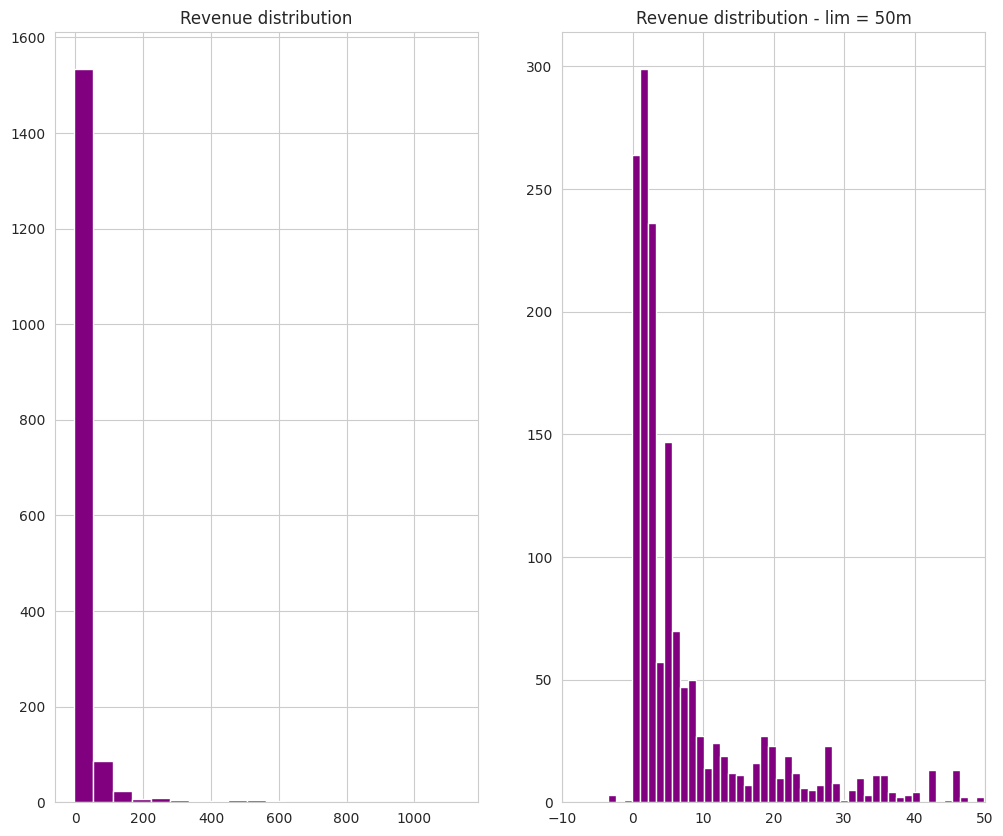

In [139]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 10))

    plt.subplot(1, 2, 1)
    plt.title("Revenue distribution")
    plt.hist(all_earnings, bins=20, color='purple')

    plt.subplot(1, 2, 2)
    plt.title("Revenue distribution - lim = 50m")
    plt.xlim(left=-10, right=50)
    plt.hist(all_earnings, bins=1000, color='purple')

In [140]:
more_than_one_deal = 0
for sublist in money_earned.values():
    if len(sublist) > 1:
        more_than_one_deal += 1

more_than_one_deal

225

So, out of 1037 distinct investors, 225 had more than one deal. Let's plot the distribution of the average profit of these investors

In [141]:
mean_revenues_with_yc = []

for key, sublist in money_earned.items():
    if len(sublist) > 1:
        mean_revenues_with_yc.append(np.mean(sublist))

print("Mean inverstor deals statistics: ", stats.describe(mean_revenues_with_yc))

Mean inverstor deals statistics:  DescribeResult(nobs=225, minmax=(0.3144015029069767, 239.95694117647056), mean=20.085956651577064, variance=1201.3714141401902, skewness=3.4616477414684286, kurtosis=14.188223734667055)


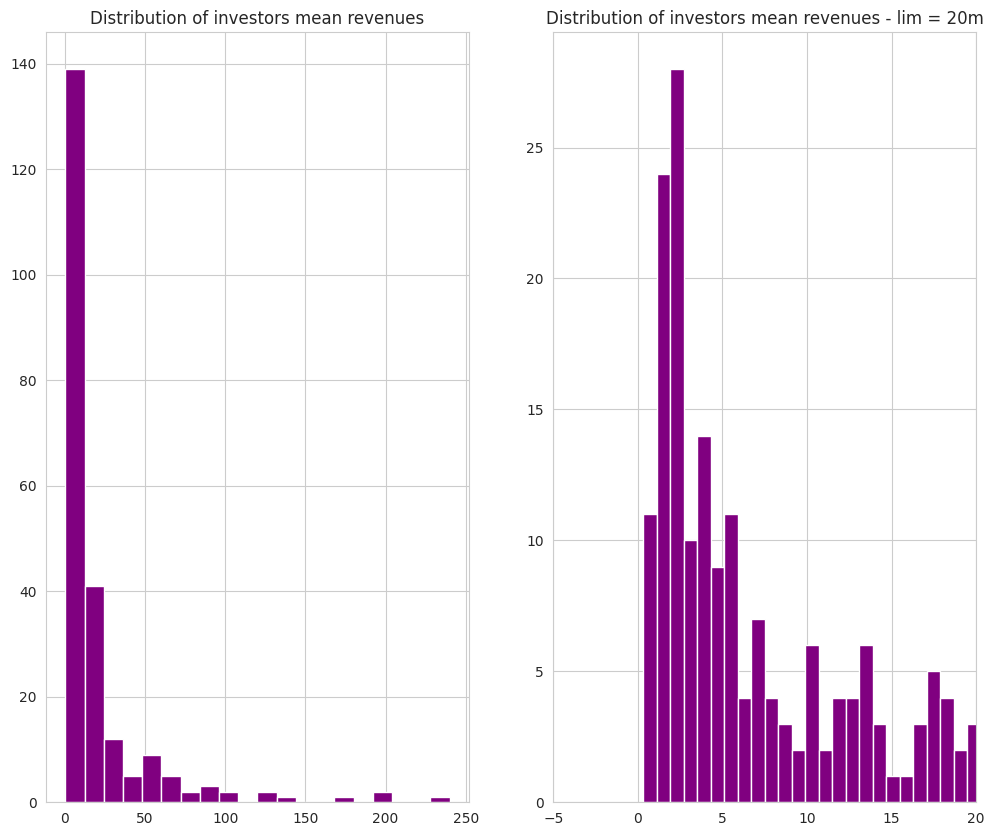

In [142]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 10))

    plt.subplot(1, 2, 1)
    plt.title("Distribution of investors mean revenues")
    plt.hist(mean_revenues_with_yc, bins=20, color='purple')

    plt.subplot(1, 2, 2)
    plt.title("Distribution of investors mean revenues - lim = 20m")
    plt.xlim(left=-5, right=20)
    plt.hist(mean_revenues_with_yc, bins=300, color='purple')

Now let's take a look at the top investors in terms of average profit, as well as the most successful deals of investors and the companies they were in. Also, let's look at the top losing deals.

In [148]:
top_ten_mean_investors = sorted([(combined_dict[k], np.mean(v)) for k, v in money_earned.items() if len(v) > 1], key=lambda x: np.mean(x[1]), reverse=True)[:10]
top_ten_mean_investors

[('Andrew Houston (Andrew Houston)', 239.95694117647056),
 ('Peak XV Partners', 199.2375),
 ('IVP (Cack Wilhelm)', 198.34400000000002),
 ('Ribbit Capital (Meyer Malka)', 169.63637983333334),
 ('T. Rowe Price (NAS: TROW)', 136.04642857142858),
 ('Lightspeed Venture Partners (Ravi Mhatre)', 121.38203964285715),
 ('Golden Ventures', 120.19829230769231),
 ('A.Capital Ventures', 106.2423111111111),
 ('Kleiner Perkins (Mamoon Hamid)', 104.55054267917268),
 ('Greenoaks Capital Partners', 94.88327272727273)]

In [154]:
# best top-10 investions. Format investor name: revenue
top_ten_greatest_investions = sorted([(combined_dict[k], np.max(v)) for k, v in money_earned.items()], key=lambda x: np.max(x[1]), reverse=True)[:10]
top_ten_greatest_investions

[('Wellcome Trust', 1130.41),
 ('Forerunner Ventures (Kirsten Green)', 1047.6764999999998),
 ('Y Combinator', 881.1500000000001),
 ('Founders Fund (Napoleon Ta)', 582.81425),
 ('Lightspeed Venture Partners (Ravi Mhatre)', 582.81425),
 ('Kleiner Perkins (Mamoon Hamid)', 563.3035714285714),
 ('Andrew Houston (Andrew Houston)', 475.38999999999993),
 ('Justin Kan (Justin Kan)', 475.38999999999993),
 ('Index Ventures (Mark Goldberg)', 475.38999999999993),
 ('Ribbit Capital (Meyer Malka)', 396.25)]

Lets see what was the company that brought the most money in revenue to 'Wellcome Trust'

In [156]:
unique_keys_count[reversed_combined_dict['Wellcome Trust']]

'58167-28,'

In [158]:
best_company = filtered_df[filtered_df['Company ID'] == '58167-28']
best_company

,xid,Companies,Company ID,Deal ID,Deal Date,Deal Size,Pre-money Valuation,Post Valuation,% Acquired,Price per Share,...,Deal Type,Deal Size Status,Post Valuation Status,Investors,New Investors,Lead/Sole Investors,Revenue Growth since last debt deal,Revenue,EBITDA,Total Debt (from financials)
224,152497,DoorDash (NYS: DASH),58167-28,61703-83T,22/03/2016 00:00,127.0,590.0,717.0,0.1771,23.94,...,Later Stage VC,Actual,Actual,"{'11227-60': 'Khosla Ventures (Keith Rabois)', '11228-50': 'Kleiner Perkins (John Doerr)', '11295-73': 'Sequoia Capital (Alfred Lin)', '10366-57': 'Wellcome Trust', '40420-36': 'Y Combinator (Paul Buchheit)'}",Wellcome Trust,{'11295-73': 'Sequoia Capital (Alfred Lin)'},NaN,NaN,NaN,NaN
516,202879,DoorDash (NYS: DASH),58167-28,116349-58T,21/02/2019 00:00,400.0,6700.0,7100.0,0.0563,112.38,...,Later Stage VC,Actual,Actual,"{'56091-70': 'Coatue Management', '56059-66': 'Dragoneer Investment Group', '40773-97': 'DST Global', '54886-96': 'FundersClub', '12421-90': 'GIC (Singapore) (Jeremy Kranz)', '11295-73': 'Sequoia Capital (Alfred Lin)', '182433-16': 'SoftBank Investment Advisers (Jeffrey Housenbold)', '11313-73': 'Temasek Holdings', '40420-36': 'Y Combinator'}","Dragoneer Investment Group, FundersClub, Temasek Holdings","{'56059-66': 'Dragoneer Investment Group', '11313-73': 'Temasek Holdings'}",NaN,291.0,-201.0,0.0


That's well known DoorDash! Lets see the same about the forst deal which belongs to GV

In [159]:
top_ten_lost_investions = sorted([(combined_dict[k], np.min(v)) for k, v in money_earned.items()], key=lambda x: np.min(x[1]), reverse=False)[:10]
top_ten_lost_investions

[('GV (Sangeen Zeb)', -3.497085),
 ('Burst Capital', -3.497085),
 ('Spark Capital (Yasmin Razavi)', -3.497085),
 ('Emagen Entertainment', -0.7110000000000001),
 ('Y Combinator', 0.03914525581395345),
 ('Alexis Ohanian (Alexis Ohanian)', 0.03914525581395345),
 ('Lee Linden (Lee Linden)', 0.03914525581395345),
 ('Paul Buchheit', 0.03914525581395345),
 ('Sam Altman (Sam Altman)', 0.03914525581395345),
 ('Garry Tan (Garry Tan)', 0.03914525581395345)]

In [160]:
unique_keys_count[reversed_combined_dict['GV']]

'56005-84,55401-40,55758-97,61260-13,63690-94,63690-94,97867-54,55401-40,61260-13,65530-72,56005-84,65530-72,185001-58,167915-26,65530-72,433412-74,185001-58,265276-09,433412-74,265276-09,267849-46,'

As we can see - GV invested in a lot of companies. But top-3 lost deals look the same which makes me think that all of those investors invested in the same company

In [161]:
unique_keys_count[reversed_combined_dict['Burst Capital']]

'187709-59,174742-39,167915-26,268172-29,'

In [162]:
unique_keys_count[reversed_combined_dict['Spark Capital']]

'167915-26,182560-06,228814-93,63692-65,182560-06,224624-71,266258-80,266258-80,266258-80,266258-80,'

This proves my point  - company we are looking for is 167915-26

In [163]:
worst_company = filtered_df[filtered_df['Company ID'] == '167915-26']
worst_company

,xid,Companies,Company ID,Deal ID,Deal Date,Deal Size,Pre-money Valuation,Post Valuation,% Acquired,Price per Share,...,Deal Type,Deal Size Status,Post Valuation Status,Investors,New Investors,Lead/Sole Investors,Revenue Growth since last debt deal,Revenue,EBITDA,Total Debt (from financials)
518,203054,Instawork,167915-26,119101-42T,26/02/2019 00:00,18.00,85.0,103.00,0.1748,4.43,...,Early Stage VC,Actual,Actual,"{'11133-01': 'Benchmark (San Francisco) (Bill Gurley)', '233424-82': 'Burst Capital', '49063-60': 'GV (Jessica Verrilli)', '11303-02': 'Spark Capital (Nabeel Hyatt)', '50980-60': 'SV Angel', '52815-70': 'Tuesday Capital', '40420-36': 'Y Combinator'}","Benchmark (San Francisco), Burst Capital, GV, Spark Capital","{'233424-82': 'Burst Capital', '49063-60': 'GV (Jessica Verrilli)', '11303-02': 'Spark Capital (Nabeel Hyatt)'}",NaN,NaN,NaN,NaN
519,203110,Instawork,167915-26,116866-00T,27/02/2019 00:00,9.95,13.0,22.95,0.5092,1.95,...,Early Stage VC,Actual,Estimated,"{'11133-01': 'Benchmark (San Francisco) (Bill Gurley)', '127685-89': 'L2 Venture', '50980-60': 'SV Angel', '52815-70': 'Tuesday Capital', '40420-36': 'Y Combinator'}",NaN,{'11133-01': 'Benchmark (San Francisco) (Bill Gurley)'},NaN,NaN,NaN,NaN
